UNIVERSIDADE ESTADUAL DO MARANHÃO

CURSO DE ENGENHARIA DA COMPUTAÇÃO - BACHARELADO

PROCESSAMENTO DIGITAL DE IMAGENS E RECONHECIMENTO DE PADRÕES

PROF. DR. LUCIO FLAVIO DE ALBUQUERQUE CAMPOS

AUTORES:    
>JULIO VICTOR CASTRO CARVALHO DE ARAUJO

>LUCIANO SILVA DE ARRUDA




#### SEGUNDA AVALIAÇÃO (01/03/2021)

[01.] Elabore um algoritmo de detecção de círculos utilizando a Tranformada de Hough. A
imagem (autoral) de entrada deve possuir no mínimo 5 objetos circulares, de diâmetros
diferentes.


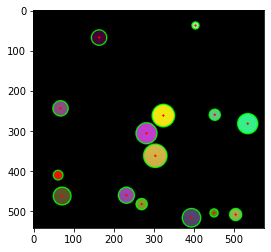

In [1]:
# Pacotes utilizados:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('teste\\BouncingBalls.png') 
 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_blurred = cv2.blur(gray, (3, 3))

detected_circles = cv2.HoughCircles(gray_blurred, 
				cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
			param2 = 30, minRadius = 1, maxRadius = 50) 

if detected_circles is not None: 

    detected_circles = np.uint16(np.around(detected_circles)) 
    
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 

        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 

        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


[02.] Elabora um algoritmo de classificação de frutas (apenas duas), através dos momentos
inerciais e de máquinas de vetores de suporte, com no mínimo, 75% de acurácia. Os
passos para a determinada tarefa são os seguintes:

> [a.] Fazer um banco de 100 imagens (50 de cada fruta);

> [b.] Extrair apenas o canal verde, e calcular os 24 momentos inerciais;

> [c.] Gerar uma matriz, de dimensão 100x25, onde o numero de linhas é o número de amostras, e o numero de colunas, o numero de carateristicas (24) e o rótulo (1);  

> [d.] Usar o classificador SVM em anexo, para realizar a classificação, e a métrica de
desempenho.


In [2]:
dir = 'C:\\projetos\\PDI'

frutas = ['morango', 'cacau']

x_image = []
y_label = []
Mm = []

def preprocessamento(img, tam=150):
    b,g,r = cv2.split(img)
    resized = cv2.resize(g, (tam, tam))

    return resized


for fruta in frutas:
    filepath = os.path.join(dir, fruta)
    for file in os.listdir(filepath):
        filename = os.path.join(filepath, file)
        #print(filename)
        image = cv2.imread(filename)
        prep  = preprocessamento(image, 50)
        DM = (cv2.moments(prep))
        M  = [momento for momento in DM.items()]
        Mm.append(DM)
        #print(M.shape)
        x_image.append(M)
        y_label.append(frutas.index(fruta))
        continue
    continue
    break
x_image_n = np.array(x_image)
len(x_image)

100

In [3]:
import pandas as pd

df = pd.DataFrame(data=Mm)
data=df.reset_index().values
print(data.shape) 
print(type(data))

#data[:,0] = y_label
#data[:,:-1] = data[:,1:]
#data[:,-1] = y_label

print(data.shape) 
print(type(data))
pd.DataFrame(data)

(100, 25)
<class 'numpy.ndarray'>
(100, 25)
<class 'numpy.ndarray'>


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,485058.0,12154520.0,11443469.0,423839452.0,289608193.0,387857071.0,1.645898e+10,1.020350e+10,9.826232e+09,...,6.100008e+07,-2.754972e+07,2.575351e+08,0.000507,1.215244e-05,0.000501,-8.481868e-07,3.722599e-07,-1.681253e-07,1.571637e-06
1,1.0,451550.0,11163161.0,10611170.0,392078201.0,258925596.0,364753766.0,1.537654e+10,9.168820e+09,8.834225e+09,...,1.234306e+08,-2.326201e+07,2.218069e+08,0.000569,-1.668674e-05,0.000566,-4.159191e-07,9.008620e-07,-1.697785e-07,1.618865e-06
2,2.0,393358.0,9304482.0,9223605.0,318429398.0,216919156.0,330924287.0,1.230780e+10,7.443239e+09,7.834226e+09,...,3.599700e+07,6.544344e+07,2.923738e+08,0.000636,-8.116085e-06,0.000741,1.271025e-06,3.709337e-07,6.743668e-07,3.012788e-06
3,3.0,391152.0,9469963.0,9199863.0,325242215.0,223167425.0,322567193.0,1.257612e+10,7.743176e+09,7.797635e+09,...,7.245846e+07,-3.230606e+07,1.189245e+08,0.000627,2.840989e-06,0.000694,5.736784e-07,7.572254e-07,-3.376138e-07,1.242818e-06
4,4.0,484004.0,11790887.0,11051792.0,406074983.0,265649084.0,371605798.0,1.572060e+10,9.220529e+09,8.856904e+09,...,1.228501e+08,-3.210902e+07,4.539115e+08,0.000507,-1.530402e-05,0.000509,2.344907e-07,7.537950e-07,-1.970175e-07,2.785151e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95.0,224103.0,5441765.0,5341350.0,174917087.0,129748210.0,173416404.0,6.354755e+09,4.167781e+09,4.207241e+09,...,-3.549466e+06,-5.983502e+06,2.980449e+07,0.000852,9.410647e-07,0.000918,1.255324e-06,-1.492945e-07,-2.516728e-07,1.253610e-06
96,96.0,493944.0,11962772.0,12002533.0,396978706.0,289272025.0,403437355.0,1.487022e+10,9.588661e+09,9.709685e+09,...,1.090879e+07,7.694608e+06,3.164127e+07,0.000440,-5.803405e-06,0.000458,3.540497e-07,6.361835e-08,4.487374e-08,1.845268e-07
97,97.0,215500.0,5852663.0,4970712.0,200825093.0,137328578.0,160636448.0,7.547088e+09,4.737915e+09,4.416452e+09,...,-2.093807e+07,-5.374711e+07,4.827775e+07,0.000902,5.020111e-05,0.000990,-8.422375e-06,-9.712219e-07,-2.493084e-06,2.239385e-06
98,98.0,255967.0,6543395.0,5798433.0,221154839.0,151023978.0,187768285.0,8.376248e+09,5.105059e+09,4.959749e+09,...,-4.772971e+07,3.306517e+07,1.188406e+08,0.000822,4.267656e-05,0.000861,-9.686208e-07,-1.439888e-06,9.974952e-07,3.585130e-06


In [4]:
pd.DataFrame(y_label)

,0
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


In [5]:
# Pacotes utilizados:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics


In [6]:
#Dividindo o Dataset em Treino e teste
y_label_n = np.array(y_label)
X_train, X_test, y_train, y_test = train_test_split(data, y_label, test_size=0.3,random_state=109)

#Criando o Classificador
cls = svm.SVC(kernel="linear")

#Treinamento
cls.fit(X_train, y_train)

#Predição
pred = cls.predict(X_test)

#Métricas de Desempenho
#Acurácia
print("acuracy:", metrics.accuracy_score(y_test,y_pred=pred))
#Precisão
print("precision:", metrics.precision_score(y_test,y_pred=pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred=pred))
print(metrics.classification_report(y_test, y_pred=pred))

In [6]:
type(data)

numpy.ndarray